## Test the implemented functions

In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
from imz2mat import *
import GaussianDenoiser as gd
import ADMM

%load_ext autoreload


### TEST THE Functions

In [2]:
test = np.array([[1,2,3,3,4],[1,2,3,3,4],[2,3,4,4,5],[1,2,3,3,4],[1,4,3,3,5]])
testx, testy = gd.grad(test)
print(testx)
print(testy)
test00 = gd.div(np.zeros((5,5)),testy)+gd.div(testx,np.zeros((5,5)))
print(gd.div(testx,testy))

[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.]
 [ 0.  2.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]]
[[ 1.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.]
 [ 3. -1.  0.  2.  0.]]
[[ 1.  0. -1.  1. -1.]
 [ 2.  1.  0.  2.  0.]
 [-1. -2. -3. -1. -3.]
 [ 2.  3.  0.  2.  1.]
 [ 3. -6.  1.  2. -3.]]


In [3]:
test00 = gd.div(np.zeros((5,5)),testy)+gd.div(testx,np.zeros((5,5)))
test = test00.copy()
test00[test00 < 0 ] = 999
test00-test

array([[   0.,    0., 1000.,    0., 1000.],
       [   0.,    0.,    0.,    0.,    0.],
       [1000., 1001., 1002., 1000., 1002.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0., 1005.,    0.,    0., 1002.]])

### Import a temporal series and compute its geometric mean

imz2mat : version Septembre 2017
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/13
image en .ima
image en .ima
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 13  verif :  1
1024 1024
-type CS16
lecture de  data/SAINTGERVAIS/pilesaintgervaisF.ima  en quelconque 1024 1024 13  offset  0 >h 2  complex 1 blocksize 4194304
Boucle de lecture entre 0 et 13   sur 13 canaux
Lecture du canal 1/13
Données complexes (standard). Nouvelle version de imz2mat  >h
Lecture du canal 2/13
Données complexes (standard). Nouvelle version de imz2mat  >h
Lecture du canal 3/13
Données complexes (standard). Nouvelle version de imz2mat  >h
Lecture du canal 4/13
Données complexes (standard). Nouvelle version de imz2mat  >h
Lecture du canal 5/13
Données complexes (standard). Nouvelle version de imz2mat  >h
Lecture du canal 6/13

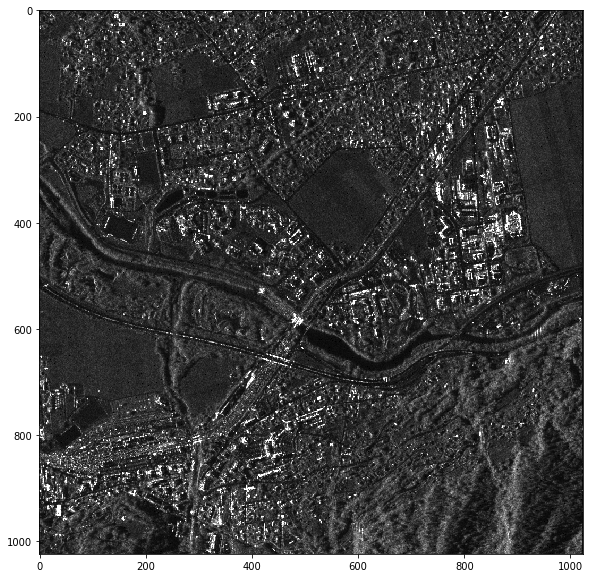

In [4]:
plt.figure(figsize = (10,10))
im1 = imz2mat('data/SAINTGERVAIS/pilesaintgervaisF.ima')
imclean = utils.geometricMean(np.abs(im1[0]))
utils.displayRSO(imclean)

## Homomorphic approach with chambolle and Pock

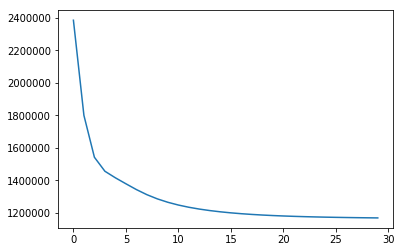

In [5]:
# load an image
im = np.abs(im1[0][:,:,0])

#convert its intensity in log scale
test = np.log(1+im**2)

# erase the values -inf 
# test[test < -500 ] =-500
u, E = gd.TVgaussianDenoiser(test,oldlamb = 1,niter = 30)
plt.plot(E)

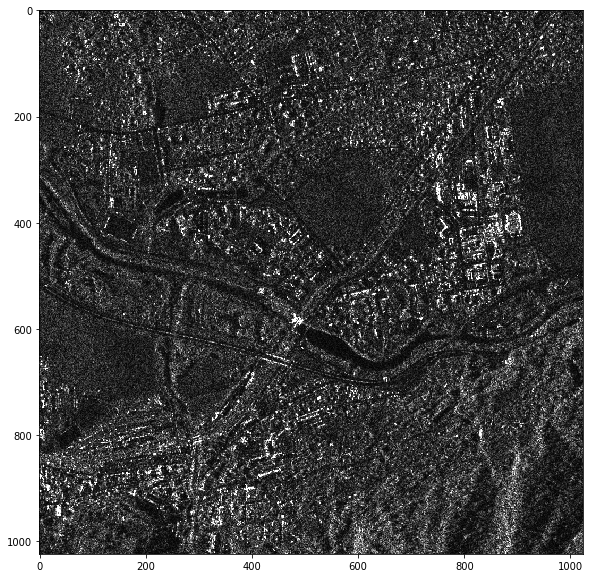

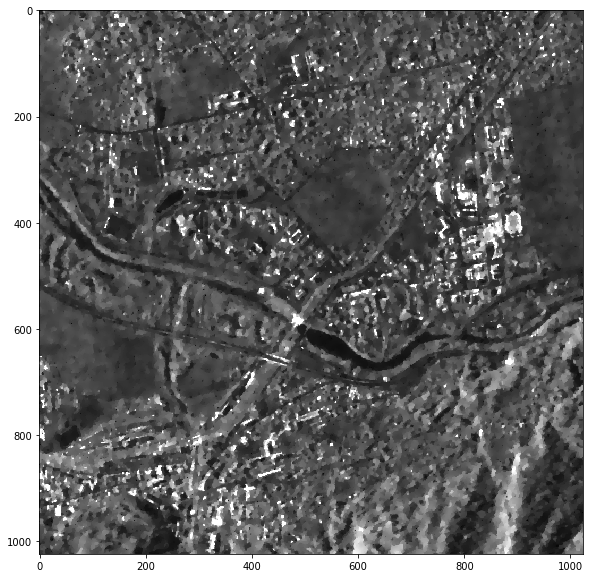

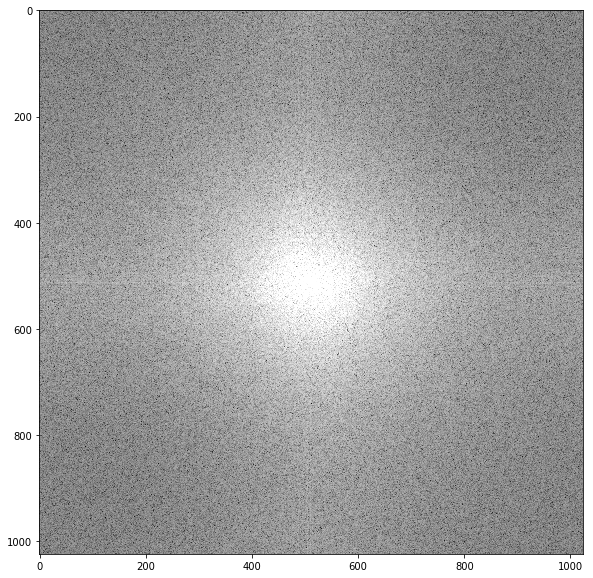

In [6]:
import scipy
plt.figure(figsize = (10,10))
utils.displayRSO(im)

plt.figure(figsize = (10,10))
utils.displayRSO(np.sqrt(np.exp(u+scipy.special.digamma(1))))

plt.figure(figsize = (10,10))
utils.displayRSO(np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(u)))))


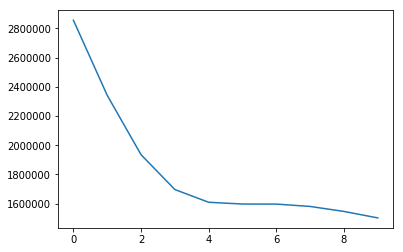

In [6]:
plt.plot(E)

In [4]:
u, E = ADMM.AMM(test,beta = 0.5,lamb = 2,niter = 20)

35881962.71014407
24542998.690598287
19835032.9655871
17963652.980625283
17279294.69363398
17073379.555484187
17047357.78331517
17079456.595912494
17122832.09795961
17161516.340946082
47940229.13656519
34135063.225611605
28399773.44313374
26117648.769551996
25281299.80852869
25028208.273638114
24994802.556655508
25032675.177753482
25084653.85807947
25131186.42996817
55906518.622841135
42101352.71188756
36366062.92940969
34083938.25582795
33247589.29480464
32994497.75991407
32961092.042931464
32998964.664029457
33050943.34435541
33097475.916244105
63872808.10911709
50067642.198163524
44332352.41568565
42050227.74210391
41213878.781080626
40960787.24619001
40927381.52920741
40965254.15030543
41017232.83063139
41063765.40252008
71839097.59539306
58033931.68443946
52298641.90196163
50016517.22837985
49180168.26735656
48927076.73246595
48893671.01548335
48931543.63658138
48983522.316907324
49030054.88879602
79805387.08166902
66000221.17071544
60264931.38823758
57982806.714655824
57146457.75

### Create artificial noise

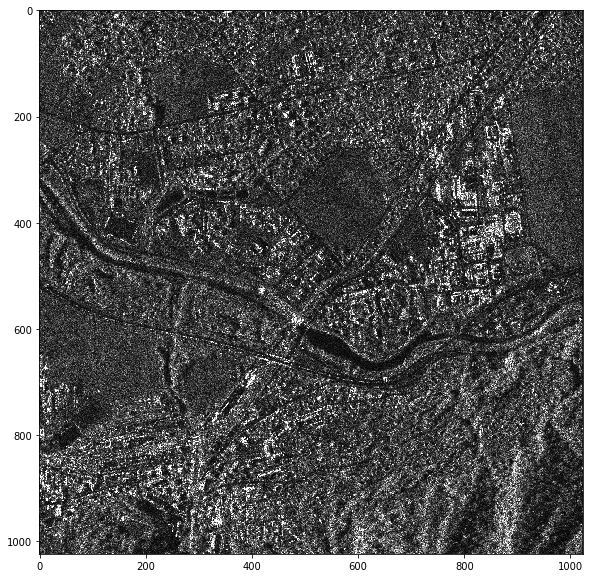

In [4]:
plt.figure(figsize = (10,10))
im = utils.addSARnoise(imclean, L=1, intensite = False)
utils.displayRSO(im)

### Compare result with the true noise of the first view

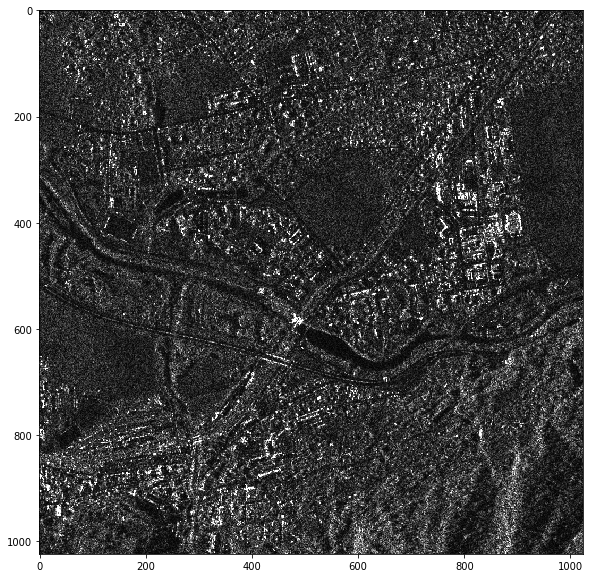

In [4]:
plt.figure(figsize = (10,10))
utils.displayRSO(np.abs(im1[0][:,:,0]))

In [5]:
imclean.shape

(1024, 1024)

### compare the result with gaussian noise

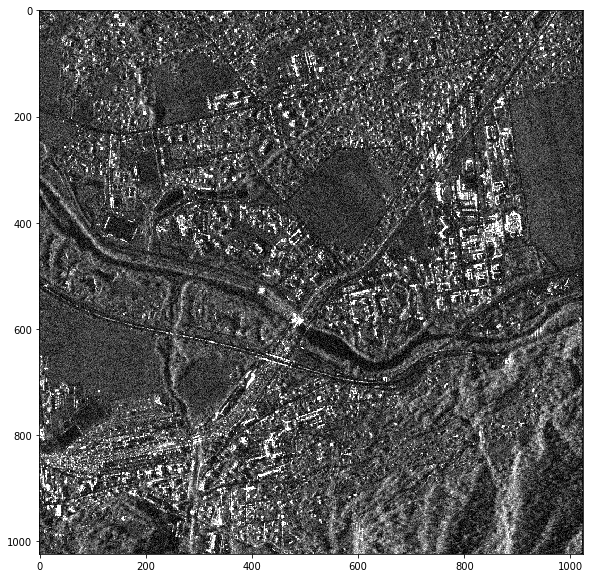

In [5]:
plt.figure(figsize = (10,10))
imgaus = imclean + 30*np.random.randn(*imclean.shape)
imgaus[imgaus <0] = 0
utils.displayRSO(imgaus)

## Load another dataset

In [6]:
im1 = imz2mat('data/Pilechenguang1_512x512RECALZ4.IMA')

imz2mat : version Septembre 2017
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/24
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  512   512   canaux: 24  verif :  1
512 512
-type CFLOAT
lecture de  data/Pilechenguang1_512x512RECALZ4.IMA  en quelconque 512 512 24  offset  0 <f 4  complex 1 blocksize 2097152
Boucle de lecture entre 0 et 24   sur 24 canaux
Lecture du canal 1/24
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 2/24
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 3/24
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 4/24
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 5/24
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 6/24
Donn

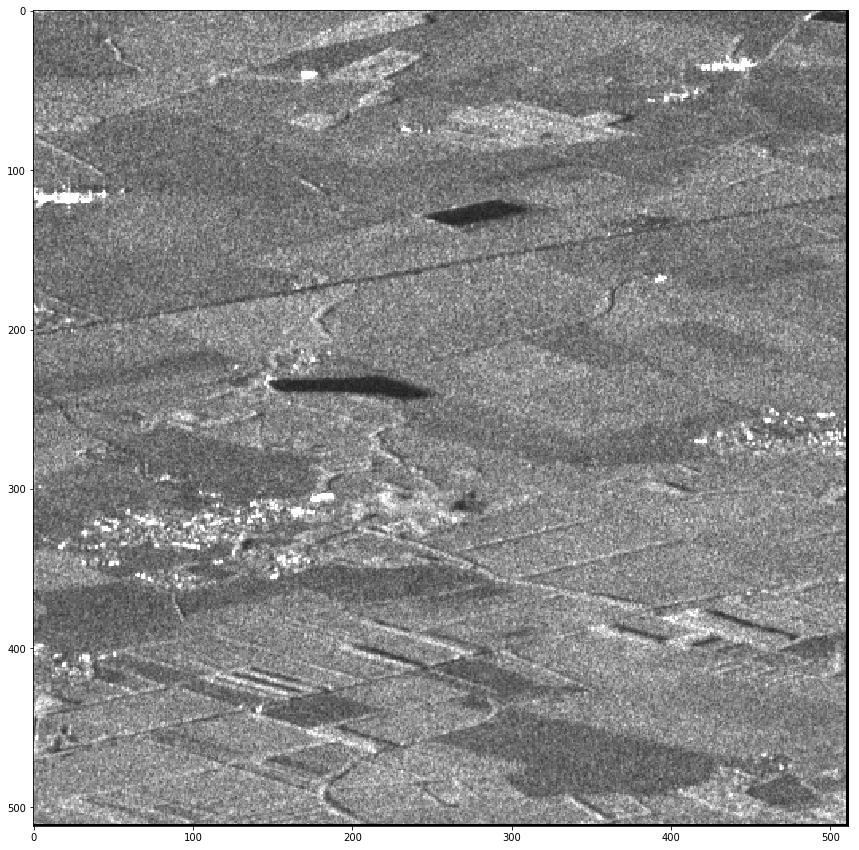

In [17]:
plt.figure(figsize = (15,15))
imclean = utils.geometricMean(np.abs(im1[0]))
utils.displayRSO(imclean)

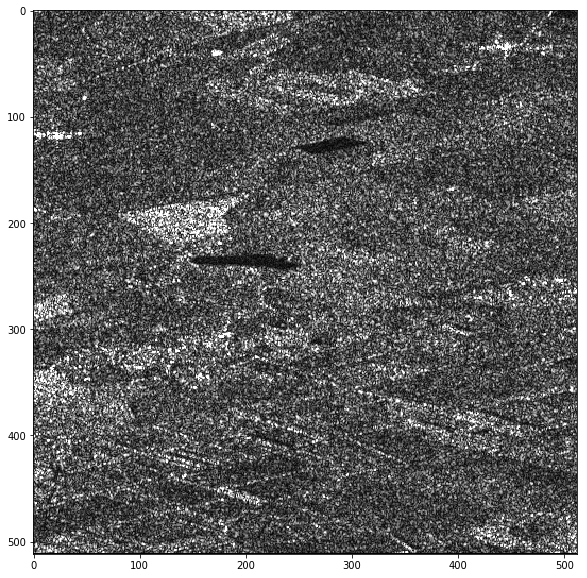

In [19]:
plt.figure(figsize = (10,10))
utils.displayRSO(np.abs(im1[0][:,:,10]))

In [ ]:
im1 = imz2mat('data/Pilesaclaycoord_1536x1024RECALZ4.IMA')

imz2mat : version Septembre 2017
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/69
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1536   1024   canaux: 69  verif :  1
1536 1024
-type CFLOAT
lecture de  data/Pilesaclaycoord_1536x1024RECALZ4.IMA  en quelconque 1536 1024 69  offset  0 <f 4  complex 1 blocksize 12582912
